<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Cross Validation - Random Forest - Boston Houses 
</b></font> </br></p> 

---

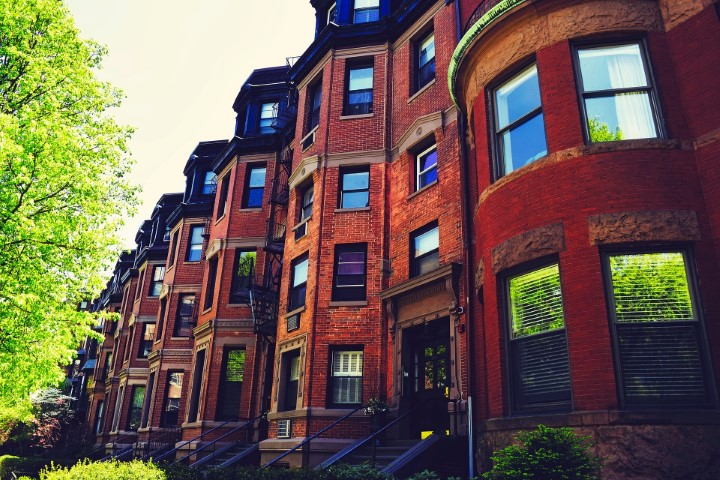

Bild von <a href="https://pixabay.com/de/users/12019-12019/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1977009">David Mark</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1977009">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
---

<p><font color='black' size="5">
Warnungen ausschalten
</font></p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   

Das Boston Housing Dataset wurde aus Informationen abgeleitet, die vom U.S. Census Service über das Wohnen in der Gegend von Boston, MA, gesammelt wurden.


[DataSet](https://www.openml.org/search?type=data&status=active&id=531)

[Info](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset)


In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', data_id=531)

data = df.data.copy()
target = df.target.copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [ ]:
data.describe().T

In [ ]:
target.value_counts()

# **2 <font color='orange'>|</font> Prepare**
---


<p><font color='black' size="5">
Bestimmen der numerischen/kategorischen Merkmale/Features
</font></p>

In [4]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>

In [5]:
from sklearn.preprocessing import OrdinalEncoder
data[cat_col]= data[cat_col].astype(str)
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

# **3 <font color='orange'>|</font> Modeling**
---

<p><font size="5">
Train-Test-Split
</p>

In [6]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.30, random_state=42)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((354, 13), (152, 13), (354,), (152,))

<p><font size="5">
Modelauswahl & Training
</p>

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=250, max_features=4, max_depth=10, min_samples_leaf=15)
model.fit(data_train, target_train)

RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=15,
                      n_estimators=250)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Prognose
</font></p>

In [31]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)


<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>


In [32]:
from sklearn.metrics import r2_score
r2_train = r2_score(target_train, target_train_pred)
print(f'Modell: {model}\n -- Train --- Bestimmtheitsmass: {r2_train:5.2f}' )

Modell: RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=15,
                      n_estimators=250)
 -- Train --- Bestimmtheitsmass:  0.81


In [33]:
r2_test = r2_score(target_test, target_test_pred)
print(f'Modell: {model}\n -- Test --- Bestimmtheitsmass: {r2_test:5.2f}' )

Modell: RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=15,
                      n_estimators=250)
 -- Test --- Bestimmtheitsmass:  0.76



<p><font color='black' size="5">
Feature Importance
</font></p>

In [ ]:
import plotly.express as px
px.bar(x=model.feature_importances_, y=data.columns).update_yaxes(categoryorder="total ascending")

<p><font color='black' size="5">
Vergleich Reals vs Predict
</font></p>

In [ ]:
target_test_pred = pd.DataFrame(target_test_pred, columns=['predict'])
target_test = pd.DataFrame(target_test.values, columns=['test'])
pd.options.display.float_format = '{:,.0f}'.format
results = pd.concat([target_test, target_test_pred], axis=1)
results['Abw%'] = (results['test'] - results['predict']) / results['test'] *100
%precision 3
results.head(10).style.format("{:,.1f}")

<p><font size="5">
Cross-Validation Trainingsdaten
</p>



In [35]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=3, shuffle=True, random_state=42)

In [36]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, data_train, target_train, 
                            scoring='r2', cv=cv, return_train_score=True, return_estimator=True)

In [37]:
cv_results

{'fit_time': array([0.361, 0.35 , 0.35 ]),
 'score_time': array([0.021, 0.018, 0.018]),
 'estimator': [RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=15,
                        n_estimators=250),
  RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=15,
                        n_estimators=250),
  RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=15,
                        n_estimators=250)],
 'test_score': array([0.617, 0.732, 0.77 ]),
 'train_score': array([0.802, 0.74 , 0.749])}

In [17]:
train_result = cv_results['train_score'].mean()
val_result = cv_results['test_score'].mean()
print(f"Train {train_result:.2f} -- Validation {val_result:.2f}")

Train 0.89 -- Validation 0.80


<p><font size="5">
Cross-Validation Testdaten
</p>

In [18]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model, data_test, target_test, scoring='r2', cv=cv)
print(f"Score für jede Aufspaltung: {cv_score}")
print(f"Mittelwert über alle Aufspaltungen: {cv_score.mean():.2f}")

Score für jede Aufspaltung: [0.626 0.705 0.785]
Mittelwert über alle Aufspaltungen: 0.71


In [19]:
r2 = model.score(data_test, target_test)
print(f'Bestimmtheitsmass: {r2:5.2f}' )

Bestimmtheitsmass:  0.83


# **5 <font color='orange'>|</font> Deploy**
---